## Basic Probability Calculations


In [1]:
import sys
sys.path.append("../")

from scipy import special
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import integrate

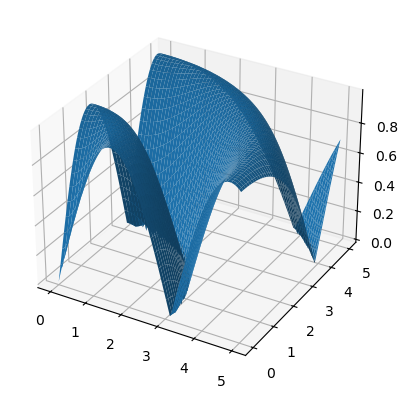

In [5]:
# define a function that would give you a 2D distribution. Do not pick a Gaussian.

# define a prior box:

# Generate data
x = np.linspace(0, 5, 100)
y = np.linspace(0, 5, 100)
x, y = np.meshgrid(x, y)
z = abs(np.sin(np.sqrt(x**2 + y**2)))

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z)

# Save as image
#plt.savefig("3d_plot.png")

# Display plot
plt.show()



In [ ]:
# sample your reference probability on a 2D regular grid in the prior box

In [ ]:
# normalize the pdf


In [ ]:
# contour plot the distribution (on generic iso-contours, the default ones work)

In [ ]:
# marginalize the distribution and get two 1D distributions. Plot them.